<a href="https://colab.research.google.com/github/nelsonbeas33/procesamiento-datos/blob/main/tarea3/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Distribución de categorías:
category
sci.space           999
rec.sport.hockey    987
Name: count, dtype: int64

Entrenamiento: 1588 muestras
Prueba: 398 muestras

🔵 Regresión Logística - Exactitud: 1.0
Reporte de clasificación:
                  precision    recall  f1-score   support

       sci.space       1.00      1.00      1.00       200
rec.sport.hockey       1.00      1.00      1.00       198

        accuracy                           1.00       398
       macro avg       1.00      1.00      1.00       398
    weighted avg       1.00      1.00      1.00       398


🟢 Naive Bayes - Exactitud: 0.9974874371859297
Reporte de clasificación:
                  precision    recall  f1-score   support

       sci.space       1.00      1.00      1.00       200
rec.sport.hockey       1.00      0.99      1.00       198

        accuracy                           1.00       398
       macro avg       1.00      1.00      1.00       398
    weighted avg       1.00      1.00      1.00       39

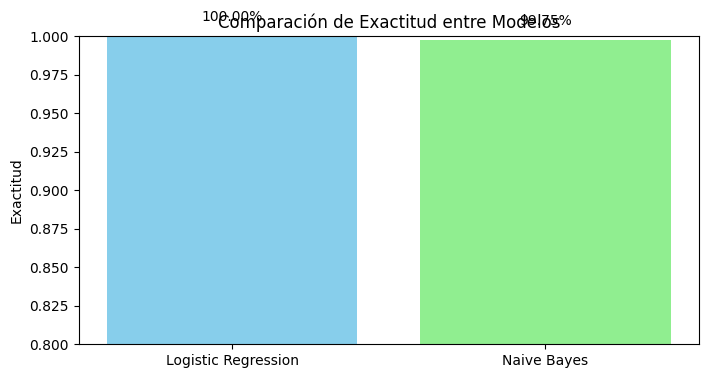

In [6]:
# Instalar librerías necesarias
!pip install scikit-learn

# Importar librerías
import pandas as pd
import re
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Cargar el dataset "20 Newsgroups" (solo 2 categorías)
categories = ['sci.space', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Convertir a DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target
})
df['category'] = df['target'].map({0: 'sci.space', 1: 'rec.sport.hockey'})

# Mostrar distribución de categorías
print("Distribución de categorías:")
print(df['category'].value_counts())

# 2. Preprocesamiento básico
def simple_preprocess(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar caracteres especiales
    return text

# Aplicar preprocesamiento
df['clean_text'] = df['text'].apply(simple_preprocess)

# Vectorización con TF-IDF
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
y = df['target']

# 3. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nEntrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

# 4. Entrenar y evaluar modelos
# Modelo 1: Regresión Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\n🔵 Regresión Logística - Exactitud:", accuracy_score(y_test, y_pred_lr))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=categories))

# Modelo 2: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\n🟢 Naive Bayes - Exactitud:", accuracy_score(y_test, y_pred_nb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_nb, target_names=categories))

# 5. Comparación visual de modelos
modelos = ['Logistic Regression', 'Naive Bayes']
precision = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb)]

plt.figure(figsize=(8, 4))
plt.bar(modelos, precision, color=['skyblue', 'lightgreen'])
plt.ylim(0.8, 1.0)
plt.title('Comparación de Exactitud entre Modelos')
plt.ylabel('Exactitud')

for i, v in enumerate(precision):
    plt.text(i, v+0.01, f"{v:.2%}", ha='center')
plt.show()

Distribución de categorías:
category
sci.space           999
rec.sport.hockey    987
Name: count, dtype: int64

Estadísticas de longitud de textos:
count     1986.000000
mean      1897.186808
std       3269.252397
min        162.000000
25%        795.250000
50%       1229.000000
75%       1936.000000
max      75154.000000
Name: text_length, dtype: float64


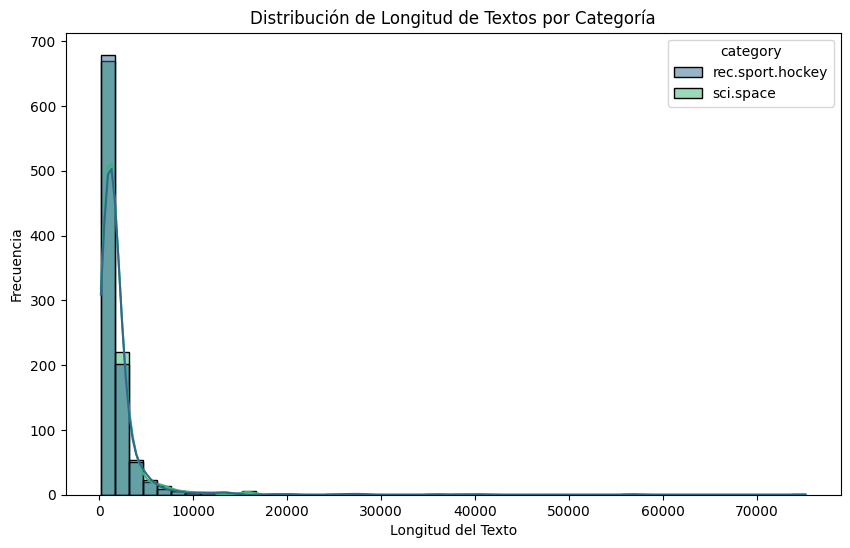


Entrenamiento: 1588 muestras
Prueba: 398 muestras

🔵 Regresión Logística - Mejores parámetros: {'C': 10}
Exactitud: 0.9974874371859297
Reporte de clasificación:
                  precision    recall  f1-score   support

       sci.space       1.00      1.00      1.00       200
rec.sport.hockey       1.00      0.99      1.00       198

        accuracy                           1.00       398
       macro avg       1.00      1.00      1.00       398
    weighted avg       1.00      1.00      1.00       398



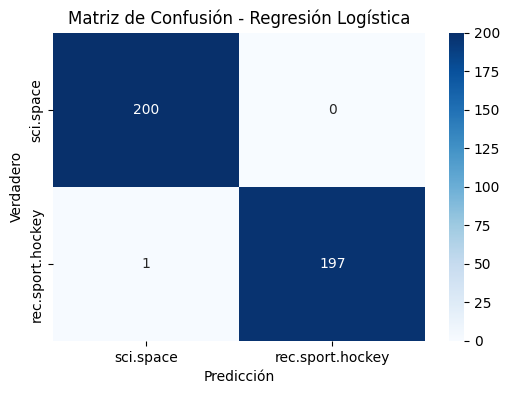


🟢 Naive Bayes - Mejores parámetros: {'alpha': 0.01}
Exactitud: 0.9974874371859297
Reporte de clasificación:
                  precision    recall  f1-score   support

       sci.space       1.00      1.00      1.00       200
rec.sport.hockey       1.00      0.99      1.00       198

        accuracy                           1.00       398
       macro avg       1.00      1.00      1.00       398
    weighted avg       1.00      1.00      1.00       398



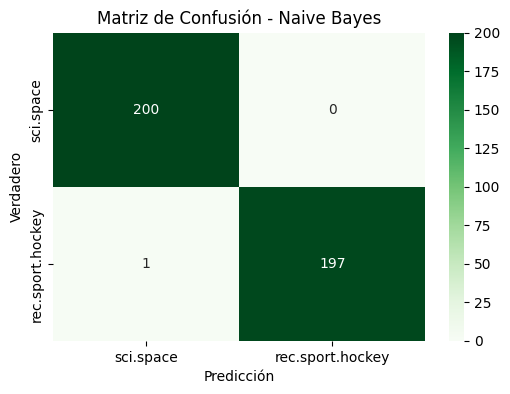


Comparación de Modelos:
                Modelo  Exactitud Mejores Parámetros
0  Regresión Logística   0.997487          {'C': 10}
1          Naive Bayes   0.997487    {'alpha': 0.01}


<ipython-input-7-d0b5c60b5b91>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Exactitud', data=results_df, palette='magma')


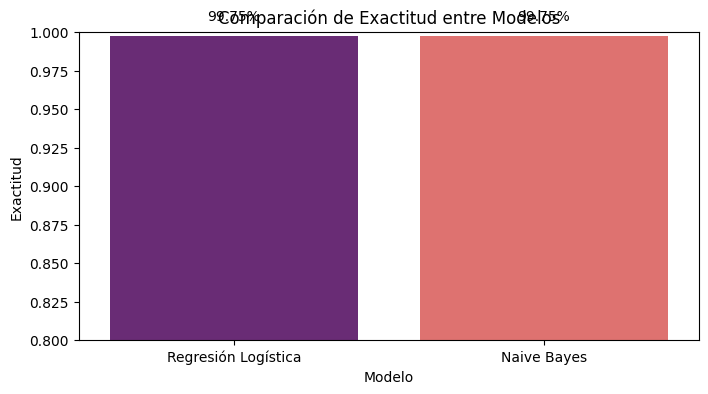

In [7]:
# Instalar librerías necesarias
!pip install scikit-learn

# Importar librerías
import pandas as pd
import re
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset "20 Newsgroups" (solo 2 categorías)
categories = ['sci.space', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# Convertir a DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target
})
df['category'] = df['target'].map({0: 'sci.space', 1: 'rec.sport.hockey'})

# 2. Análisis Exploratorio de Datos (EDA)
print("Distribución de categorías:")
print(df['category'].value_counts())

# Longitud de los textos
df['text_length'] = df['text'].apply(len)
print("\nEstadísticas de longitud de textos:")
print(df['text_length'].describe())

# Visualización de la longitud de textos por categoría
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='category', bins=50, kde=True, palette='viridis')
plt.title('Distribución de Longitud de Textos por Categoría')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

# 3. Preprocesamiento básico
def simple_preprocess(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar caracteres especiales
    return text

# Aplicar preprocesamiento
df['clean_text'] = df['text'].apply(simple_preprocess)

# Vectorización con TF-IDF
tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
y = df['target']

# 4. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nEntrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

# 5. Entrenar y evaluar modelos
# Modelo 1: Regresión Logística con optimización de hiperparámetros
lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}  # Parámetros a optimizar
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)

print("\n🔵 Regresión Logística - Mejores parámetros:", grid_lr.best_params_)
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=categories))

# Matriz de confusión para Regresión Logística
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Modelo 2: Naive Bayes con optimización de hiperparámetros
nb = MultinomialNB()
param_grid_nb = {'alpha': [0.01, 0.1, 1, 10]}  # Parámetros a optimizar
grid_nb = GridSearchCV(nb, param_grid_nb, cv=3, scoring='accuracy')
grid_nb.fit(X_train, y_train)
y_pred_nb = grid_nb.predict(X_test)

print("\n🟢 Naive Bayes - Mejores parámetros:", grid_nb.best_params_)
print("Exactitud:", accuracy_score(y_test, y_pred_nb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_nb, target_names=categories))

# Matriz de confusión para Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# 6. Comparación detallada de modelos
# Crear DataFrame con resultados
results = {
    'Modelo': ['Regresión Logística', 'Naive Bayes'],
    'Exactitud': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb)],
    'Mejores Parámetros': [grid_lr.best_params_, grid_nb.best_params_]
}
results_df = pd.DataFrame(results)

# Mostrar resultados
print("\nComparación de Modelos:")
print(results_df)

# Gráfica comparativa
plt.figure(figsize=(8, 4))
sns.barplot(x='Modelo', y='Exactitud', data=results_df, palette='magma')
plt.ylim(0.8, 1.0)
plt.title('Comparación de Exactitud entre Modelos')
plt.ylabel('Exactitud')

for i, v in enumerate(results_df['Exactitud']):
    plt.text(i, v+0.01, f"{v:.2%}", ha='center')
plt.show()